# Movie Data Collection and Cleaning

#### Datasets
- [Rotten Tomatoes](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset)
    - Critic Reviews and Movie Listings
- [IMDb](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)
    - Moving Listing with Ratings
 
 

#### Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.impute import KNNImputer

pd.set_option("display.max_columns",350)

#### Load in Rotten Tomatoes Datasets

In [49]:
rt_critic = pd.read_csv('./data/rotten_tomatoes_critic_reviews.csv')
print(rt_critic.shape)
rt_critic.head()

(1130017, 8)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [50]:
rt_movie = pd.read_csv('./data/rotten_tomatoes_movies.csv')
print(rt_movie.shape)
rt_movie.head()

(17712, 22)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [51]:
# Merge datasets
rt = pd.merge(left = rt_critic, right = rt_movie, left_on = 'rotten_tomatoes_link', right_on = 'rotten_tomatoes_link', how = 'inner')
print(rt.shape)
rt.head()

(1129887, 29)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [52]:
# Checking for duplicates
rt[['critic_name','movie_title','review_score','review_content']].duplicated().sum()

120788

In [53]:
# Dropping duplicate rows
rt.drop_duplicates(subset = ['critic_name','movie_title','review_score','review_content'], keep = 'first', inplace = True)
rt.shape

(1009099, 29)

In [54]:
# Before I move on & start cleaning, I want to see what were the top 10 movies reviewed
most_reviewed = rt['movie_title'].value_counts().sort_values(ascending = False)[0:10]

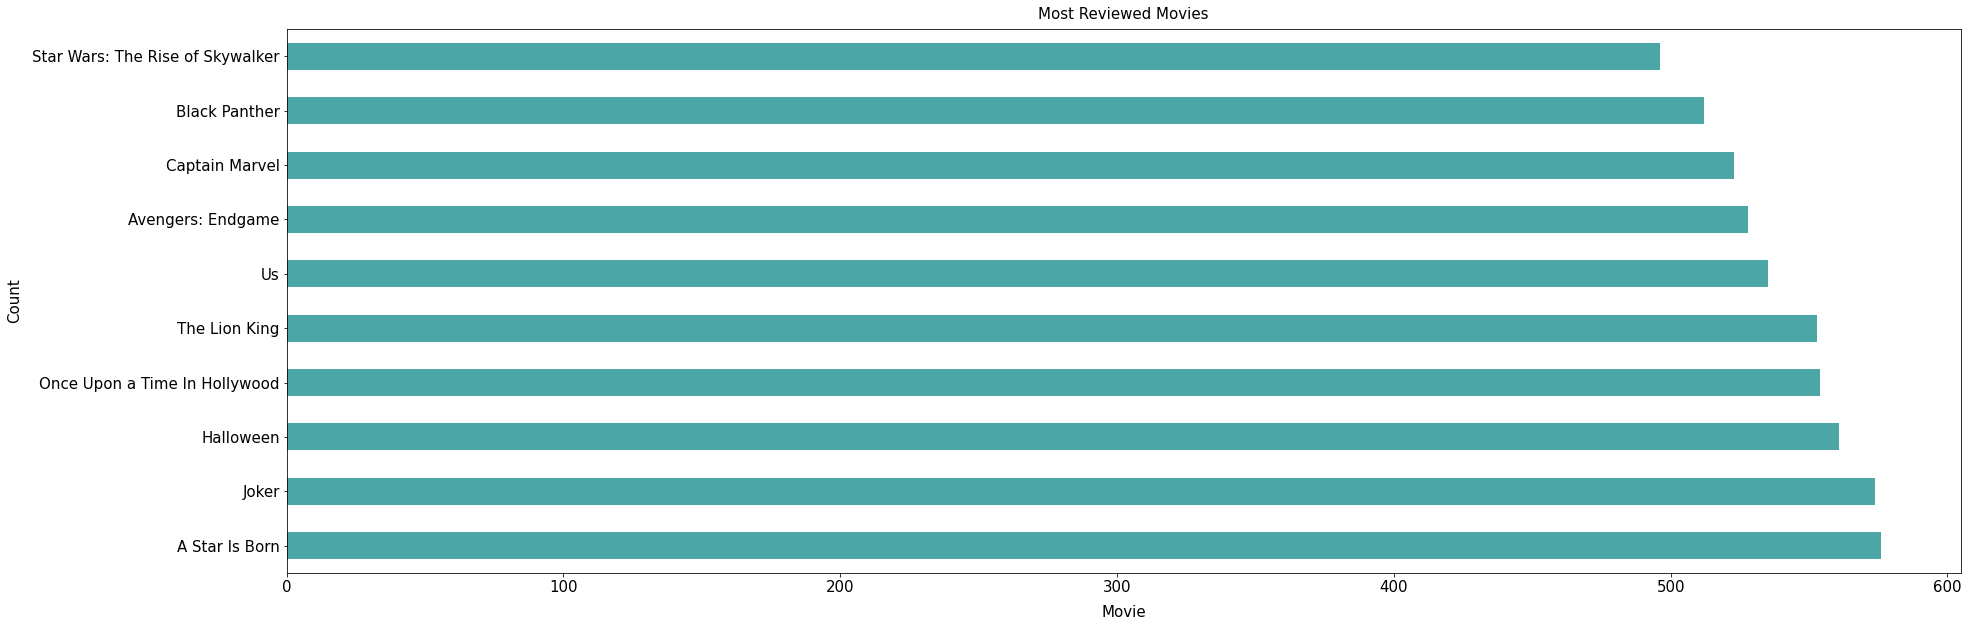

In [55]:
plt.figure(figsize = (30,10))
most_reviewed.plot(kind = 'barh', color = 'teal', alpha = 0.7)
plt.title('Most Reviewed Movies', size = 15, pad = 10)
plt.xticks(size = 15)
plt.xlabel('Movie', size = 15, labelpad = 10)
plt.yticks(size = 15)
plt.ylabel('Count', size = 15, labelpad = 10)
plt.savefig('images/most_reviewed_movies.png');

In [56]:
# Checking count of movies
rt['movie_title'].value_counts()

A Star Is Born                          576
Joker                                   574
Halloween                               561
Once Upon a Time In Hollywood           554
The Lion King                           553
                                       ... 
The Quiet Family (Choyonghan kajok)       4
Adventures of a Teenage Dragonslayer      4
Mob Queen                                 3
Finder's Fee                              3
Farewell                                  1
Name: movie_title, Length: 17100, dtype: int64

In [57]:
rt.isnull().sum()

rotten_tomatoes_link                     0
critic_name                          15440
top_critic                               0
publisher_name                           0
review_type                              0
review_score                        273501
review_date                              0
review_content                       57368
movie_title                              0
movie_info                            8839
critics_consensus                   123032
content_rating                           0
genres                                 237
directors                            12919
authors                              49388
actors                                9354
original_release_date                20522
streaming_release_date                9196
runtime                               7410
production_company                   10819
tomatometer_status                    1230
tomatometer_rating                    1230
tomatometer_count                     1230
audience_st

Need movie description information for this project. Dropping nulls for critic name, movie info, critics consensus, genres, review content, audience status. Will not impact the project as there will still be a lot of data to work with. 

In [58]:
rt.dropna(subset = ['critic_name','movie_info','critics_consensus','genres', 
                    'review_content', 'audience_status'], inplace = True)
rt.isnull().sum()

rotten_tomatoes_link                     0
critic_name                              0
top_critic                               0
publisher_name                           0
review_type                              0
review_score                        223057
review_date                              0
review_content                           0
movie_title                              0
movie_info                               0
critics_consensus                        0
content_rating                           0
genres                                   0
directors                            10460
authors                              32501
actors                                5742
original_release_date                10062
streaming_release_date                1165
runtime                                 54
production_company                    4688
tomatometer_status                       0
tomatometer_rating                       0
tomatometer_count                        0
audience_st

In [59]:
# Renaming identifying link as id 
rt.rename(columns = {'rotten_tomatoes_link':'id'}, inplace = True)
rt.head(2)

,id,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [60]:
# Making id column for critics
rt['critic_id'] = rt.groupby(['critic_name']).ngroup()
# Used https://stackoverflow.com/questions/51110171/how-to-assign-a-unique-id-to-detect-repeated-rows-in-a-pandas-dataframe to make critic id

In [61]:
# Converting review score to float 
fract = []
def convert(fraction):
    if fraction == 'A+':
        fract.append(1)
    elif fraction == 'A':
        fract.append(1)
    elif fraction == 'A-' or fraction == 'A  -':
        fract.append(.91)
    elif fraction == 'B+':
        fract.append(.83)
    elif fraction == 'B':
        fract.append(.75)
    elif fraction == 'B-':
        fract.append(.67)
    elif fraction == 'C+':
        fract.append(.58)
    elif fraction == 'C':
        fract.append(.50)
    elif fraction == 'C-' or fraction == 'C  -':
        fract.append(.42)
    elif fraction == 'D+':
        fract.append(.33)
    elif fraction == 'D':
        fract.append(.25)
    elif fraction == 'D-':
        fract.append(.16)
    elif fraction == 'F+':
        fract.append(8)
    elif fraction == 'F':
        fract.append(0)
    elif fraction == '0':
        fract.append(0)
    else:
        try:
            try:
                try:
                    num, denom = fraction.split('/') 
                    fract.append(float(num)/float(denom))
                except: 
                    num = int(fraction)
                    fract.append(num/100)
            except: 
                num, denom = fraction.split('/') 
                if int(denom) == 0:
                    denom == 100
                    fract.append(float(num)/100)
        except:
            fract.append(np.nan)
        
        
# Used metacritic letter grade scoring for letter review scores
# https://www.metacritic.com/about-metascores

In [62]:
# Looping through review score
for i in rt['review_score']:
    convert(i)

# Assigning fract list to new column
rt['new_review_score'] = fract

# Comparing new_review_score with original review_score
rt.loc[:,['new_review_score','review_score']]

,new_review_score,review_score
0,NaN,NaN
1,NaN,NaN
3,0.70,3.5/5
4,NaN,NaN
5,NaN,NaN
...,...,...
1129872,0.83,B+
1129873,NaN,NaN
1129874,1.00,5/5
1129877,NaN,NaN


Looks like the conversion went well, but there are a lot of Nulls. Dropping nulls as KNN imputer took too long. Will not impact the project as there will still be a lot of data to work with. 

In [63]:
rt.dropna(subset = ['new_review_score'], inplace = True)
rt['new_review_score'].isnull().sum()

0

In [64]:
# Dropping original review score column and renaming new review score column
rt.drop(columns = 'review_score', inplace = True)
rt.rename(columns = {'new_review_score':'review_score'}, inplace = True)

KNN Imputer

In [65]:
rt.isnull().sum()

id                                      0
critic_name                             0
top_critic                              0
publisher_name                          0
review_type                             0
review_date                             0
review_content                          0
movie_title                             0
movie_info                              0
critics_consensus                       0
content_rating                          0
genres                                  0
directors                            7574
authors                             22856
actors                               3891
original_release_date                6292
streaming_release_date                815
runtime                                27
production_company                   2968
tomatometer_status                      0
tomatometer_rating                      0
tomatometer_count                       0
audience_status                         0
audience_rating                   

In [66]:
# Filling original release date & streaming release date as it will not impact the model for the recommender system
rt['original_release_date'].fillna(0, inplace = True)
rt['streaming_release_date'].fillna(0, inplace = True)

KNN Imputer

In [67]:
# Getting numeric data for knn
numeric = rt._get_numeric_data()

# Filling ratings and counts with KNN Imputer
knn = KNNImputer()

df = knn.fit_transform(numeric)

df = pd.DataFrame(df, columns = numeric.columns, index = rt.index)

In [68]:
# Filling missing numeric values with knn
rt['audience_rating'].fillna(df['audience_rating'], inplace = True)
rt['audience_count'].fillna(df['audience_count'], inplace = True)
rt['tomatometer_rating'].fillna(df['tomatometer_rating'], inplace = True)
rt['tomatometer_count'].fillna(df['tomatometer_count'], inplace = True)
rt['runtime'].fillna(df['runtime'], inplace = True)

In [69]:
rt.isnull().sum()

id                                      0
critic_name                             0
top_critic                              0
publisher_name                          0
review_type                             0
review_date                             0
review_content                          0
movie_title                             0
movie_info                              0
critics_consensus                       0
content_rating                          0
genres                                  0
directors                            7574
authors                             22856
actors                               3891
original_release_date                   0
streaming_release_date                  0
runtime                                 0
production_company                   2968
tomatometer_status                      0
tomatometer_rating                      0
tomatometer_count                       0
audience_status                         0
audience_rating                   

In [71]:
# One hot encoding review types (fresh or rotten (upright for audience))
rt['review_type'] = np.where(rt['review_type'] == 'Fresh', 1, 0)
rt['tomatometer_status'] = np.where((rt['tomatometer_status'] == 'Fresh') | (rt['tomatometer_status'] == 'Certified-Fresh'), 1, 0)
rt['audience_status'] = np.where(rt['audience_status'] == 'Upright', 1, 0)
rt['tomatometer_status'].value_counts()

1    351952
0    230968
Name: tomatometer_status, dtype: int64

In [72]:
# Setting dates to datetime
rt['review_date'] = pd.to_datetime(rt['review_date'])
rt['original_release_date'] = pd.to_datetime(rt['original_release_date'])
rt['streaming_release_date'] = pd.to_datetime(rt['streaming_release_date'])

In [73]:
# Creating a year column
rt['year'] = rt['original_release_date'].dt.year
rt['year'].fillna(0, inplace = True)
rt['year'] = rt['year'].astype(int)

#### Load in IMDb Dataset

In [74]:
imdb = pd.read_csv('./data/IMDb movies.csv')
imdb.head(2)

/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12/26/06,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,"$2,250",NaN,NaN,NaN,7.0,7.0


- Need to keep imdb_title_id, country, director, writer, production company, actors, description, avg_vote, votes
- Fill Rotten Tomatoes null objects with IMDb director, writer, production company, & actors 
- Keep description and country for nlp recommender system, but need to rename 
- Keep imdb_id for future reference
- Keep avg_votes and votes for modeling and recommender system

In [75]:
print(imdb.shape)
imdb.columns

(85855, 22)


Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [76]:
# Dropping unnecessary columns
imdb.drop(columns = ['date_published','genre', 'year','duration', 'language',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'], inplace = True)

In [77]:
# Checking nulls
imdb.isnull().sum()

imdb_title_id            0
title                    0
original_title           0
country                 64
director                87
writer                1572
production_company    4455
actors                  69
description           2115
avg_vote                 0
votes                    0
dtype: int64

In [78]:
# Need description, so dropping nulls
imdb.dropna(subset = ['description'], inplace = True)

Merging Datasets

In [79]:
df = pd.merge(left = rt, right = imdb, left_on = ['movie_title'], right_on = ['original_title'], how = 'left')
print(df.shape)
df.head(2)

(717194, 42)


,id,critic_name,top_critic,publisher_name,review_type,review_date,review_content,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors_x,original_release_date,streaming_release_date,runtime,production_company_x,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_id,review_score,year,imdb_title_id,title,original_title,country,director,writer,production_company_y,actors_y,description,avg_vote,votes
0,m/0814255,Ben McEachen,False,Sunday Mail (Australia),1,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,0,49.0,149.0,0,53.0,254421.0,43,73,76,1022,0.70,2010,tt0814255,Percy Jackson e gli dei dell'Olimpo - Il ladro...,Percy Jackson & the Olympians: The Lightning T...,"UK, Canada, USA",Chris Columbus,"Craig Titley, Rick Riordan",Fox 2000 Pictures,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",A teenager discovers he's the descendant of a ...,5.9,174198.0
1,m/0814255,Nick Schager,False,Slant Magazine,0,2010-02-10,Harry Potter knockoffs don't come more transpa...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,0,49.0,149.0,0,53.0,254421.0,43,73,76,7475,0.25,2010,tt0814255,Percy Jackson e gli dei dell'Olimpo - Il ladro...,Percy Jackson & the Olympians: The Lightning T...,"UK, Canada, USA",Chris Columbus,"Craig Titley, Rick Riordan",Fox 2000 Pictures,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",A teenager discovers he's the descendant of a ...,5.9,174198.0


In [80]:
print(df['movie_title'].value_counts().count())
print(df['critic_name'].value_counts().count())

8687
6397


In [81]:
# # Filling rotten tomatoes missing object values with imdb values
df['directors'] = df['directors'].fillna(df['director'])
df['authors'] = df['authors'].fillna(df['writer'])
df['actors_x'] = df['actors_x'].fillna(df['actors_y'])
df['production_company_x'] = df['production_company_x'].fillna(df['production_company_y'])

In [82]:
df.isnull().sum()

id                                       0
critic_name                              0
top_critic                               0
publisher_name                           0
review_type                              0
review_date                              0
review_content                           0
movie_title                              0
movie_info                               0
critics_consensus                        0
content_rating                           0
genres                                   0
directors                             1380
authors                              15167
actors_x                              2611
original_release_date                    0
streaming_release_date                   0
runtime                                  0
production_company_x                  1367
tomatometer_status                       0
tomatometer_rating                       0
tomatometer_count                        0
audience_status                          0
audience_ra

In [83]:
# Filling missing object values with no __ 
df['directors'] = df['directors'].fillna('no director listed')
df['authors'] = df['authors'].fillna('no author listed')
df['actors_x'] = df['actors_x'].fillna('no actors listed')
df['production_company_x'] = df['production_company_x'].fillna('no production company listed')

In [42]:
df.columns

Index(['id', 'critic_name', 'top_critic', 'publisher_name', 'review_type',
       'review_date', 'review_content', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors_x', 'original_release_date', 'streaming_release_date',
       'runtime', 'production_company_x', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'critic_id', 'review_score', 'year', 'imdb_title_id', 'title',
       'original_title', 'country', 'director', 'writer',
       'production_company_y', 'actors_y', 'description', 'avg_vote', 'votes'],
      dtype='object')

In [84]:
# Dropping extra imdb columns 
df.drop(columns = ['title', 'original_title','director', 'writer', 'production_company_y', 'actors_y'], inplace = True)

In [85]:
# Checking for nulls again
df.isnull().sum()

id                                       0
critic_name                              0
top_critic                               0
publisher_name                           0
review_type                              0
review_date                              0
review_content                           0
movie_title                              0
movie_info                               0
critics_consensus                        0
content_rating                           0
genres                                   0
directors                                0
authors                                  0
actors_x                                 0
original_release_date                    0
streaming_release_date                   0
runtime                                  0
production_company_x                     0
tomatometer_status                       0
tomatometer_rating                       0
tomatometer_count                        0
audience_status                          0
audience_ra

Took too long to use KNN Imputer for the avg vote and votes. Dropping null as it I will still have a large enough dataset to work with. 

In [86]:
df.dropna(subset = ['avg_vote','votes'], inplace = True)

In [87]:
# Filling missing object values with no __ 
df['imdb_title_id'] = df['imdb_title_id'].fillna('no id listed')
df['country'] = df['country'].fillna('no country listed')
df['country'] = df['country'].fillna('no description listed')

In [88]:
# Dropping additional columns that are not needed:
df.drop(columns = ['top_critic','tomatometer_top_critics_count','tomatometer_fresh_critics_count',
        'tomatometer_rotten_critics_count'], inplace = True)

In [89]:
# Renaming columns
col_dict = {
    'id':'rt_id',
    'critic_name':'critic_name',
    'critic_id':'critic_id',
    'top_critic':'top_critic',
    'publisher_name':'publisher',
    'review_type':'review_type',
    'review_date':'review_date',
    'review_content':'review_content',
    'review_score':'review_score',
    'movie_title':'title',
    'movie_info':'plot',
    'country':'country',
    'critics_consensus':'critics_consensus',
    'content_rating':'content_rating',
    'genres':'genre',
    'directors':'director',
    'authors':'writer',
    'actors_x':'cast',
    'year':'year',
    'original_release_date':'original_release_date',
    'streaming_release_date':'streaming_release_date',
    'runtime':'runtime',
    'production_company_x':'production_company',
    'tomatometer_status':'tomatometer_status',
    'tomatometer_rating':'tomatometer_rating',
    'tomatometer_count':'tomatometer_count',
    'audience_status':'audience_status',
    'audience_rating':'audience_rating',
    'audience_count':'audience_count',
    'imdb_title_id':'imdb_title',
    'description': 'description',
    'avg_vote':'avg_vote',
    'votes':'votes'
    }

df.rename(columns = col_dict, inplace = True)

In [92]:
df['title'].value_counts().count() # lost over half bc of cleaning

6587

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612554 entries, 0 to 717193
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   rt_id                   612554 non-null  object        
 1   critic_name             612554 non-null  object        
 2   publisher               612554 non-null  object        
 3   review_type             612554 non-null  int64         
 4   review_date             612554 non-null  datetime64[ns]
 5   review_content          612554 non-null  object        
 6   title                   612554 non-null  object        
 7   plot                    612554 non-null  object        
 8   critics_consensus       612554 non-null  object        
 9   content_rating          612554 non-null  object        
 10  genre                   612554 non-null  object        
 11  director                612554 non-null  object        
 12  writer                  612554

In [94]:
# Saving to new dataframe
df.to_csv('./data/df_for_eda.csv')